In [1]:
# -*- coding: utf-8 -*-

import os
import numpy as np
import tensorflow as tf
from sentiment_analysis_albert.classifier_utils import get_features,get_features_test
from sentiment_analysis_albert.networks import NetworkAlbert
from sentiment_analysis_albert.hyperparameters import Hyperparamters as hp
from sentiment_analysis_albert.utils import shuffle_one,select,time_now_string
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
def plot_draw(loss,flag):
    host = host_subplot(111)  # row=1 col=1 first pic
    plt.subplots_adjust(right=0.8)  # ajust the right boundary of the plot window
    host.set_xlabel("steps")
    if flag == 1:
        host.set_ylabel("test-loss")
    else:
        host.set_ylabel("test-accuracy")
    if flag == 1:
        p1, = host.plot(range(len(loss)), loss, label="loss")
    else:
        p1, = host.plot(range(len(loss)), loss, label="accuracy")
    # set location of the legend,
    # 1->rightup corner, 2->leftup corner, 3->leftdown corner
    # 4->rightdown corner, 5->rightmid ...
    host.legend(loc=1)
    # set label color
    host.axis["left"].label.set_color(p1.get_color())
    #par1.axis["right"].label.set_color(p2.get_color())
    plt.draw()
    plt.show()
eval_acc_list = []
eval_loss_list = []
eval_train_loss_list = []

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
# Load Model
pwd = 'D:\Jupyter_work\sentiment_analysis_albert'
MODEL = NetworkAlbert(is_training=True )

# Get data features
input_ids,input_masks,segment_ids,label_ids = get_features()
input_ids_test,input_masks_test,segment_ids_test,label_ids_test = get_features_test()
num_train_samples = len(input_ids)
arr = np.arange(num_train_samples)               
num_batchs = int((num_train_samples - 1)/hp.batch_size) + 1
print('number of batch:',num_batchs)
ids_test = np.arange(len(input_ids_test)) 

# Set up the graph
saver = tf.train.Saver(max_to_keep=hp.max_to_keep)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Load model saved before
MODEL_SAVE_PATH = os.path.join(pwd, hp.file_save_model)
ckpt = tf.train.get_checkpoint_state(MODEL_SAVE_PATH)
if ckpt and ckpt.model_checkpoint_path:
     saver.restore(sess, ckpt.model_checkpoint_path)
     print('Restored model!')


with sess.as_default():
    # Tensorboard writer
    writer = tf.summary.FileWriter(hp.logdir, sess.graph)
    for i in range(hp.num_train_epochs):
        indexs = shuffle_one(arr)       
        for j in range(num_batchs-1):
            i1 = indexs[j * hp.batch_size:min((j + 1) * hp.batch_size, num_train_samples)]            
            # Get features
            input_id_ = select(input_ids,i1)
            input_mask_ = select(input_masks,i1)
            segment_id_ = select(segment_ids,i1)
            label_id_ = select(label_ids,i1)         
            # Feed dict
            fd = {MODEL.input_ids: input_id_,
                  MODEL.input_masks: input_mask_,
                  MODEL.segment_ids:segment_id_,
                  MODEL.label_ids:label_id_}   
            # Optimizer            
            sess.run(MODEL.optimizer, feed_dict = fd)        
            # Tensorboard
            if j%hp.summary_step==0:
                summary,glolal_step = sess.run([MODEL.merged,MODEL.global_step], feed_dict = fd)
                writer.add_summary(summary, glolal_step)         
            # Save Model
            if j%(num_batchs//hp.num_saved_per_epoch)==0:
                if not os.path.exists(os.path.join(pwd, hp.file_save_model)):
                    os.makedirs(os.path.join(pwd, hp.file_save_model)) 
                saver.save(sess, os.path.join(pwd, hp.file_save_model, 'model_%s_%s.ckpt'%(str(i),str(j))))    
            # Log
            if j % hp.print_step == 0:
                # Loss of Train data 
                fd = {MODEL.input_ids: input_id_,
                      MODEL.input_masks: input_mask_ ,
                      MODEL.segment_ids:segment_id_,
                      MODEL.label_ids:label_id_}
                loss = sess.run(MODEL.loss, feed_dict = fd)   
                eval_train_loss_list.append(loss)
                print('Time:%s, Epoch:%s, Batch number:%s/%s, Loss:%s'%(time_now_string(),str(i),str(j),str(num_batchs),str(loss)))           
                #  Loss of Test data
                indexs_test = shuffle_one(ids_test)[:hp.batch_size_eval]
                input_id_test = select(input_ids_test,indexs_test)
                input_mask_test = select(input_masks_test,indexs_test)
                segment_id_test = select(segment_ids_test,indexs_test)
                label_id_test = select(label_ids_test,indexs_test)
                fd_test = {MODEL.input_ids:input_id_test,
                           MODEL.input_masks:input_mask_test ,
                           MODEL.segment_ids:segment_id_test,
                           MODEL.label_ids:label_id_test}
                loss = sess.run(MODEL.loss, feed_dict = fd_test)
                acc = sess.run(MODEL.accuracy, feed_dict = fd_test)
                print('Time:%s, Epoch:%s, Batch number:%s/%s, Loss(test)%s,acc:%s'%(time_now_string(),str(i),str(j),str(num_batchs),str(loss),str(acc)))           
                eval_loss_list.append(loss)
                eval_acc_list.append(acc)

    print('Optimization finished')
    print('Done')

D:\anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


pwd: D:\Jupyter_work\sentiment_analysis_albert





Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.

========== First time load BERT model! ==========


INFO:tensorflow:name bert/embeddings/word_embeddings match to bert/embeddings/word_embeddings
INFO:tensorflow:name bert/embeddings/token_type_embeddings match to bert/embeddings/token_type_embeddings
INFO:tensorflow:name bert/embeddings/position_embeddings match to bert/embeddings/position_embeddings
INFO:tensorflow:name bert/embeddings/LayerNorm/beta match to bert/embeddings/LayerNorm/beta
INFO:tensorflow:name bert/embeddings/LayerNorm/gamma match to bert/embeddings/LayerNorm/gamma
INFO:tensorflow:name bert/encoder/embedding_hidden_mapping_in/kernel match to bert/encoder/embedding_hidden_ma

D:\Jupyter_work\sentiment_analysis_albert\classifier_utils.py:128: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_csv(input_file,header=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

  + Number of params: 5.19M
<tf.Variable 'bert/embeddings/word_embeddings:0' shape=(21128, 128) dtype=float32_ref>
<tf.Variable 'bert/embeddings/token_type_embeddings:0' shape=(2, 128) dtype=float32_ref>
<tf.Variable 'bert/embeddings/position_embeddings:0' shape=(512, 128) dtype=float32_ref>
<tf.Variable 'bert/embeddings/LayerNorm/beta:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'bert/embeddings/LayerNorm/gamma:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'bert/encoder/embedding_hidden_mapping_in/kernel:0' shape=(128, 384) dtype=float32_ref>
<tf.Variable 'bert/encoder/embedding_hidden_mapping_in/bias:0' shape=(384,) dtype=float32_ref>
<tf.Variable 'bert/encoder/transformer/group_0/inner_group_0/attention_1/self/query/kernel:0' shape=(384, 384) dtype=float32_ref>
<tf.Variable 'bert/encoder/transformer/group_0/inner_group_0/attention_1/self/query/bias:0' shape=(384,) dtype=float32_ref>
<

D:\Jupyter_work\sentiment_analysis_albert\classifier_utils.py:128: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_csv(input_file,header=0)


 15996
Writing example 0 of 15996
Writing example 10000 of 15996
Get features finished!
Length of data: 4004
Read csv finished(2)!
Length of examples: 4004
Writing example 0 of 4004
Get features(test) finished!
number of batch: 250
Time:2023-05-15 17:09:09, Epoch:0, Batch number:0/250, Loss:4.4084015
Time:2023-05-15 17:09:10, Epoch:0, Batch number:0/250, Loss(test)4.2132215,acc:0.0390625
Time:2023-05-15 17:10:54, Epoch:1, Batch number:0/250, Loss:0.37014738
Time:2023-05-15 17:10:55, Epoch:1, Batch number:0/250, Loss(test)0.4370652,acc:0.890625
Time:2023-05-15 17:12:40, Epoch:2, Batch number:0/250, Loss:0.37128055
Time:2023-05-15 17:12:41, Epoch:2, Batch number:0/250, Loss(test)0.45705608,acc:0.875
Time:2023-05-15 17:14:26, Epoch:3, Batch number:0/250, Loss:0.63476485
Time:2023-05-15 17:14:26, Epoch:3, Batch number:0/250, Loss(test)0.3793489,acc:0.90625
Time:2023-05-15 17:16:11, Epoch:4, Batch number:0/250, Loss:0.18981576
Time:2023-05-15 17:16:12, Epoch:4, Batch number:0/250, Loss(test

Time:2023-05-15 18:35:47, Epoch:49, Batch number:0/250, Loss(test)1.7753794,acc:0.8671875
Time:2023-05-15 18:37:32, Epoch:50, Batch number:0/250, Loss:0.01145804
Time:2023-05-15 18:37:33, Epoch:50, Batch number:0/250, Loss(test)1.6278998,acc:0.859375
Time:2023-05-15 18:39:18, Epoch:51, Batch number:0/250, Loss:0.014486062
Time:2023-05-15 18:39:19, Epoch:51, Batch number:0/250, Loss(test)1.2631884,acc:0.8984375
Time:2023-05-15 18:41:04, Epoch:52, Batch number:0/250, Loss:1.37822635e-05
Time:2023-05-15 18:41:05, Epoch:52, Batch number:0/250, Loss(test)1.1950837,acc:0.8671875
Time:2023-05-15 18:42:50, Epoch:53, Batch number:0/250, Loss:1.8868436e-06
Time:2023-05-15 18:42:51, Epoch:53, Batch number:0/250, Loss(test)2.681533,acc:0.796875
Time:2023-05-15 18:44:37, Epoch:54, Batch number:0/250, Loss:6.3750276e-06
Time:2023-05-15 18:44:37, Epoch:54, Batch number:0/250, Loss(test)1.1879368,acc:0.890625
Time:2023-05-15 18:46:23, Epoch:55, Batch number:0/250, Loss:5.1629854e-06
Time:2023-05-15 18

Optimization finished
Done


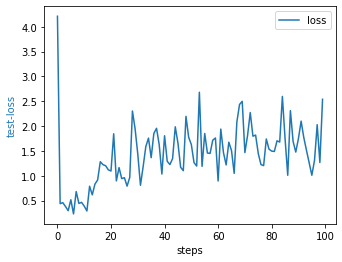

In [18]:
#draw the loss
def plot_draw(loss,flag):
    host = host_subplot(111)  # row=1 col=1 first pic
    plt.subplots_adjust(right=0.8)  # ajust the right boundary of the plot window
    
    #par1 = host.twinx()   # 共享x轴
    host.set_xlabel("steps")
    if flag == 1:
        host.set_ylabel("test-loss")
    else:
        host.set_ylabel("test-accuracy")
    if flag == 1:
        p1, = host.plot(range(len(loss)), loss, label="loss")
    else:
        p1, = host.plot(range(len(loss)), loss, label="accuracy")
 
    # set location of the legend,
    # 1->rightup corner, 2->leftup corner, 3->leftdown corner
    # 4->rightdown corner, 5->rightmid ...
    host.legend(loc=1)
 
    # set label color
    host.axis["left"].label.set_color(p1.get_color())
    #par1.axis["right"].label.set_color(p2.get_color())

    plt.draw()
    plt.show()
plot_draw(eval_loss_list,1)
#plot_acc_loss(eval_loss_list, eval_acc_list)

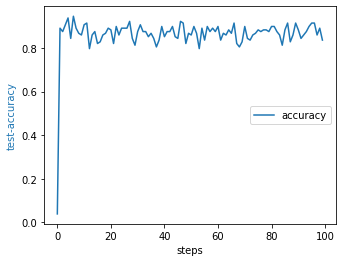

In [3]:
#draw the acc
plot_draw(eval_acc_list,0)


In [5]:
# -*- coding: utf-8 -*-
import os
import csv
import sys
import tensorflow as tf
from sentiment_analysis_albert.networks import NetworkAlbert
from sentiment_analysis_albert.classifier_utils import get_feature_test
from sentiment_analysis_albert.hyperparameters import Hyperparamters as hp
import time
import pandas as pd

pwd = 'D:\Jupyter_work\sentiment_analysis_albert'
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
sys.path.append('D:\Jupyter_work\sentiment_analysis_albert')


         

class ModelAlbertTextCNN(object):
    """
    Load NetworkAlbert TextCNN model
    """
    def __init__(self,):
        self.albert, self.sess = self.load_model()
    @staticmethod
    def load_model():
        with tf.Graph().as_default():
            sess = tf.Session()
            #out_dir = os.path.join(pwd, "model")
            out_dir = 'D:\Jupyter_work\sentiment_analysis_albert'
            with sess.as_default():
                albert =  NetworkAlbert(is_training=False)
                saver = tf.train.Saver()  
                sess.run(tf.global_variables_initializer())
                checkpoint_dir = os.path.abspath(os.path.join(out_dir,hp.file_load_model))
                print (checkpoint_dir)
                ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
                saver.restore(sess, ckpt.model_checkpoint_path)
        return albert,sess

MODEL = ModelAlbertTextCNN()
print('Load model finished!')


               
def sa(sentence):
    """
    Prediction of the sentence's sentiment.
    """
    feature = get_feature_test(sentence)
    fd = {MODEL.albert.input_ids: [feature[0]],
          MODEL.albert.input_masks: [feature[1]],
          MODEL.albert.segment_ids:[feature[2]],
          }
    output = MODEL.sess.run(MODEL.albert.preds, feed_dict=fd)
    return output[0]#int
def run_data(file_path):
    user_label = []
    with open(file_path,'r',encoding='utf_8_sig') as f:
        sent = f.read().split('\n')
    for i in sent:
        #print(i)
        user_label.append(sa(i))
    return user_label

if __name__ == '__main__':
    start = time.time()
    num_list = ['用户id']
    with open('./sentiment/caution_output.csv', 'w', newline='', encoding='utf-8-sig') as f:
        writer = csv.writer(f)
        for a in range(9):
            num_list.append(str(a))
        writer.writerow(num_list)
    path = r'D:\weibo\users.csv'
    data = pd.read_csv(path, usecols=["用户id"], dtype={"id": str})# 只要这一列,读取为字符串类型
    caution_user = []

    for n in data["用户id"]:
        i = str(n)
        filename = "D://corpus//" + i + ".txt"
        label = run_data(filename)
        if sum(label) > 0:
            caution_user.append(i)
            counting = ['0']*10
            for j in set(label):
                if label.count(j) > 0:
                    counting[j+1] =  str(label.count(j))
            counting[0] = i

            with open('./sentiment/caution_output.csv', 'a', newline='', encoding='utf-8-sig') as f:
                writer = csv.writer(f)
                writer.writerow(counting)

    end = time.time()
    print('cost:',end-start)
    print('Done')

    
    
    
    
    
    







Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
========== First time load BERT model! ==========


INFO:tensorflow:name bert/embeddings/word_embeddings match to bert/embeddings/word_embeddings
INFO:tensorflow:name bert/embeddings/token_type_embeddings match to bert/embeddings/token_type_embeddings
INFO:tensorflow:name bert/embeddings/position_embeddings match to bert/embeddings/position_embeddings
INFO:tensorflow:name bert/embeddings/LayerNorm/beta match to bert/embeddings/LayerNorm/beta
INFO:tensorflow:name bert/embeddings/LayerNorm/gamma match to bert/embeddings/LayerNorm/gamma
INFO:tensorflow:name bert/encoder/embedding_hidden_mapping_in/kernel match to bert/encoder/embedding_hidden_mapping_in/kernel
INFO:tensorflow:name bert/encoder/embedding_hidden_mapping_in/bias match to bert/e

D:\Jupyter_work\sentiment_analysis_albert\model\model_01
INFO:tensorflow:Restoring parameters from D:\Jupyter_work\sentiment_analysis_albert\model/model_01\model_99_166.ckpt
Load model finished!
cost: 1724.0015687942505
Done


In [9]:
import pandas as pd
import numpy as np


data1 = pd.read_csv('./sentiment/caution_output.csv',encoding='utf_8_sig')
data2 = pd.read_csv('./sentiment/personality_label.csv',encoding='utf_8_sig')
data3 = data1.merge(data2, left_on='用户id', right_on='ID', how='inner')
data1.merge(data2, left_on='用户id', right_on='ID', how='inner')
data1.to_csv('./sentiment/caution_output_label.csv',encoding='utf_8_sig', mode='w', header=True, index=False)

In [17]:
#对自杀用户微博的预测
# -*- coding: utf-8 -*-
import os
import csv
import sys
import tensorflow as tf
from sentiment_analysis_albert.networks import NetworkAlbert
from sentiment_analysis_albert.classifier_utils import get_feature_test
from sentiment_analysis_albert.hyperparameters import Hyperparamters as hp
import time
import pandas as pd

pwd = 'D:\Jupyter_work\sentiment_analysis_albert'
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
sys.path.append('D:\Jupyter_work\sentiment_analysis_albert')


         

class ModelAlbertTextCNN(object):
    """
    Load NetworkAlbert TextCNN model
    """
    def __init__(self,):
        self.albert, self.sess = self.load_model()
    @staticmethod
    def load_model():
        with tf.Graph().as_default():
            sess = tf.Session()
            #out_dir = os.path.join(pwd, "model")
            out_dir = 'D:\Jupyter_work\sentiment_analysis_albert'
            with sess.as_default():
                albert =  NetworkAlbert(is_training=False)
                saver = tf.train.Saver()  
                sess.run(tf.global_variables_initializer())
                checkpoint_dir = os.path.abspath(os.path.join(out_dir,hp.file_load_model))
                print (checkpoint_dir)
                ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
                saver.restore(sess, ckpt.model_checkpoint_path)
        return albert,sess

MODEL = ModelAlbertTextCNN()
print('Load model finished!')


               
def sa(sentence):
    """
    Prediction of the sentence's sentiment.
    """
    feature = get_feature_test(sentence)
    fd = {MODEL.albert.input_ids: [feature[0]],
          MODEL.albert.input_masks: [feature[1]],
          MODEL.albert.segment_ids:[feature[2]],
          }
    output = MODEL.sess.run(MODEL.albert.preds, feed_dict=fd)
    return output[0]#int
def run_data(file_path):
    user_label = []
    with open(file_path,'r',encoding='utf_8_sig') as f:
        sent = f.read().split('\n')
    for i in sent:
        #print(i)
        user_label.append(sa(i))
    return user_label

if __name__ == '__main__':
    start = time.time()
    num_list = ['用户id']
    with open('./sentiment/caution_output_suiside.csv', 'w', newline='', encoding='utf-8-sig') as f:
        writer = csv.writer(f)
        for a in range(9):
            num_list.append(str(a))
        writer.writerow(num_list)
    path = r'D:\weibo-suicide\weibo\1648007681\1648007681.csv'
    caution_user = []
    n = 1648007681
    if n>0:
        i = str(n)
        filename = "D://corpus//" + i + ".txt"
        label = run_data(filename)
        if sum(label) > 0:
            caution_user.append(i)
            counting = ['0']*10
            for j in set(label):
                if label.count(j) > 0:
                    counting[j+1] =  str(label.count(j))
            counting[0] = i

            with open('./sentiment/caution_output_suiside.csv', 'a', newline='', encoding='utf-8-sig') as f:
                writer = csv.writer(f)
                writer.writerow(counting)

    end = time.time()
    print('cost:',end-start)
    print('Done')

    
    
    
    
    
    


========== First time load BERT model! ==========
INFO:tensorflow:name bert/embeddings/word_embeddings match to bert/embeddings/word_embeddings
INFO:tensorflow:name bert/embeddings/token_type_embeddings match to bert/embeddings/token_type_embeddings
INFO:tensorflow:name bert/embeddings/position_embeddings match to bert/embeddings/position_embeddings
INFO:tensorflow:name bert/embeddings/LayerNorm/beta match to bert/embeddings/LayerNorm/beta
INFO:tensorflow:name bert/embeddings/LayerNorm/gamma match to bert/embeddings/LayerNorm/gamma
INFO:tensorflow:name bert/encoder/embedding_hidden_mapping_in/kernel match to bert/encoder/embedding_hidden_mapping_in/kernel
INFO:tensorflow:name bert/encoder/embedding_hidden_mapping_in/bias match to bert/encoder/embedding_hidden_mapping_in/bias
INFO:tensorflow:name bert/encoder/transformer/group_0/inner_group_0/attention_1/self/query/kernel match to bert/encoder/transformer/group_0/inner_group_0/attention_1/self/query/kernel
INFO:tensorflow:name bert/enco